In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

from game import *
from agents import *
from util import *
from checkers import *

In [2]:
n_features = 34
feature_func = checkers_features_augmented

# n_features = 12
# feature_func = checkers_features_simple

reward_function = checkers_reward

max_moves = 500
np.random.seed(12)
initial_weights = np.random.normal(size=n_features)
# initial_weights = np.zeros((n_features,))
first_agent = SarsaLearningAgent(feature_func, n_features, reward_function = reward_function, alpha=0., gamma=0.7, epsilon=0., is_learning_agent=False, weights=initial_weights)
ab1 = AlphaBetaAgent(1)
ab2 = AlphaBetaAgent(2)
ab3 = AlphaBetaAgent(3)
rand_agent = RandomAgent()

quiet = True

first_agent_turn = True
rules = ClassicGameRules(max_moves=max_moves)
game = rules.new_game(first_agent, rand_agent, first_agent_turn, quiet=quiet)
num_moves, game_state = game.run()
print('Oppn: Rand agent, RL agent play first', 'win =',game_state.is_first_agent_win(),'draw =',game_state.max_moves_done, 'moves =', num_moves)

first_agent_turn = False
rules = ClassicGameRules(max_moves=max_moves)
game = rules.new_game(first_agent, rand_agent, first_agent_turn, quiet=quiet)
num_moves, game_state = game.run()
print('Oppn: Rand agent, RL agent play second', 'win =',game_state.is_first_agent_win(),'draw =',game_state.max_moves_done, 'moves =', num_moves)


first_agent_turn = True
rules = ClassicGameRules(max_moves=max_moves)
game = rules.new_game(first_agent, ab1, first_agent_turn, quiet=quiet)
num_moves, game_state = game.run()
print('Oppn: AB1, RL agent play first', 'win =',game_state.is_first_agent_win(),'draw =',game_state.max_moves_done,'moves =', num_moves)


first_agent_turn = False
rules = ClassicGameRules(max_moves=max_moves)
game = rules.new_game(first_agent, ab1, first_agent_turn, quiet=quiet)
num_moves, game_state = game.run()
print('Oppn: AB1, RL agent play second', 'win =',game_state.is_first_agent_win(),'draw =',game_state.max_moves_done, 'moves =', num_moves)


    

Oppn: Rand agent, RL agent play first win = False draw = False moves = 36
Oppn: Rand agent, RL agent play second win = False draw = False moves = 117
Oppn: AB1, RL agent play first win = False draw = False moves = 40
Oppn: AB1, RL agent play second win = False draw = False moves = 35


In [3]:
results = []

alpha_list = [1e-2,1e-3,1e-4]
gamma_list = [0.3,0.7,0.9,1]
initial_epsilon = 0.35
rand_seed = [3,4,5,11,12]
max_moves = 500
np.random.seed(12)
initial_weights = np.random.normal(size=n_features)

n_train_games = 600
n_decay = 10
decay_factor = 0.95
test_frequency = 10


for alpha in alpha_list:
    for gamma in gamma_list:
        print('alpha =', alpha, 'gamma =', gamma)
        this_result = {'alpha':alpha, 'gamma':gamma}
        
        all_weights = []
        all_num = []
        training_result = []
        test_result_first = []
        test_result_second = []
        
        first_agent = SarsaLearningAgent(feature_func, n_features, reward_function = reward_function, alpha=alpha, gamma=gamma, epsilon=initial_epsilon, is_learning_agent=True, weights=initial_weights)

        for n in range(n_train_games):

            # change alpha and epsilon after n_decay games
            if n%n_decay == n_decay-1:
                first_agent.alpha = decay_factor*first_agent.alpha
                first_agent.epsilon = decay_factor*first_agent.epsilon

            if n%50 == 0: print(n)
            # train against randomly selected agent
            first_agent_turn = bool(np.random.binomial(1,0.5))
            second_agent = ab1

            rules = ClassicGameRules(max_moves=max_moves)
            game = rules.new_game(first_agent, second_agent, first_agent_turn, quiet=quiet)    
            num_moves, game_state = game.run()
            
            if game_state.is_first_agent_win():
                game_result = 1
            elif game_state.is_second_agent_win():
                game_result = -1
            else: 
                game_result = 0
                
            all_num.append(num_moves)
            training_result.append(game_result)
            all_weights.append(first_agent.weights.copy())

            if n%test_frequency == test_frequency-1 :
                # test agent: use last weights, not learning, no exploration
                current_epislon = first_agent.epsilon
                test_agent = SarsaLearningAgent(feature_func, n_features, reward_function = reward_function, alpha=0., gamma=gamma, epsilon=current_epislon, is_learning_agent=False, weights=all_weights[-1])
                
                # play first against ab1
                first_agent_turn = True
                rules = ClassicGameRules(max_moves=max_moves)
                game = rules.new_game(first_agent, ab1, first_agent_turn, quiet=quiet)
                num_moves, game_state = game.run()
                
                if game_state.is_first_agent_win():
                    game_result = 1
                elif game_state.is_second_agent_win():
                    game_result = -1
                else: 
                    game_result = 0
                
                test_result_first.append(game_result)
                
                # play second against ab1
                first_agent_turn = False
                rules = ClassicGameRules(max_moves=max_moves)
                game = rules.new_game(first_agent, ab1, first_agent_turn, quiet=quiet)
                num_moves, game_state = game.run()
                
                if game_state.is_first_agent_win():
                    game_result = 1
                elif game_state.is_second_agent_win():
                    game_result = -1
                else: 
                    game_result = 0
                
                test_result_second.append(game_result)
                
        
        this_result['weights'] = all_weights
        this_result['trainig_moves'] = all_num
        this_result['train_result'] = training_result
        this_result['test_result_first'] = test_result_first
        this_result['test_result_second'] = test_result_second
        
        results.append(this_result)
    

alpha = 0.01 gamma = 0.3
0
50
100
150
200
250
300
350
400
450
500
550
alpha = 0.01 gamma = 0.7
0
50
100
150
200
250
300
350
400
450
500
550
alpha = 0.01 gamma = 0.9
0
50
100
150
200
250
300
350
400
450
500
550
alpha = 0.01 gamma = 1
0
50
100
150
200
250
300
350
400
450
500
550
alpha = 0.001 gamma = 0.3
0
50
100
150
200
250
300
350
400
450
500
550
alpha = 0.001 gamma = 0.7
0
50
100
150
200
250
300
350
400
450
500
550
alpha = 0.001 gamma = 0.9
0
50
100
150
200
250
300
350
400
450
500
550
alpha = 0.001 gamma = 1
0
50
100
150
200
250
300
350
400
450
500
550
alpha = 0.0001 gamma = 0.3
0
50
100
150
200
250
300
350
400
450
500
550
alpha = 0.0001 gamma = 0.7
0
50
100
150
200
250
300
350
400
450
500
550
alpha = 0.0001 gamma = 0.9
0
50
100
150
200
250
300
350
400
450
500
550
alpha = 0.0001 gamma = 1
0
50
100
150
200
250
300
350
400
450
500
550


In [4]:
with open(r"learning_rate_gamma_grid_search_SARSA.pkl", "wb") as f:
    pickle.dump(results, f)

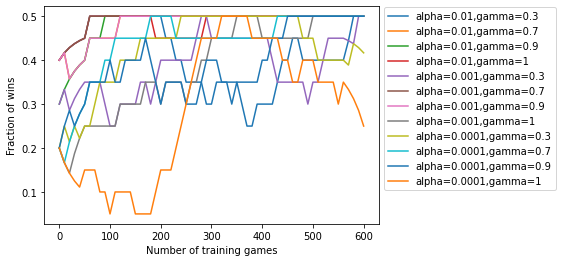

In [5]:
w = 10
test_result_len = n_train_games//test_frequency
calib = np.convolve(np.ones(test_result_len+1), np.ones(w), 'same')
for i in range(len(results)):
    this_wins_first = [False]
    this_wins_second = [False]
    this_wins_first.extend(results[i]['test_result_first'])
    this_wins_second.extend(results[i]['test_result_second'])
    this_wins_first = np.array(this_wins_first)==1
    this_wins_second = np.array(this_wins_second)==1
    mean_smooth_wins = np.convolve((this_wins_first+this_wins_second)/2, np.ones(w), 'same') / calib
    plt.plot(np.arange(0,n_train_games+1, test_frequency),mean_smooth_wins, 
             label='alpha={},gamma={}'.format(results[i]['alpha'],results[i]['gamma']))
plt.legend(bbox_to_anchor=(1,1.02))
plt.xlabel('Number of training games')
plt.ylabel('Fraction of wins');

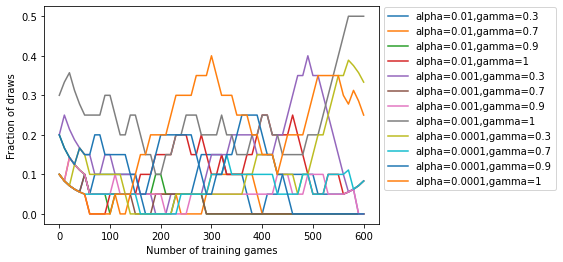

In [6]:
w = 10
test_result_len = n_train_games//test_frequency
calib = np.convolve(np.ones(test_result_len+1), np.ones(w), 'same')
for i in range(len(results)):
    this_draws_first = [False]
    this_draws_second = [False]
    this_draws_first.extend(results[i]['test_result_first'])
    this_draws_second.extend(results[i]['test_result_second'])
    this_draws_first = np.array(this_draws_first)==0
    this_draws_second = np.array(this_draws_second)==0
    mean_smooth_draws = np.convolve((this_draws_first+this_draws_second)/2, np.ones(w), 'same') / calib
    plt.plot(np.arange(0,n_train_games+1, test_frequency),mean_smooth_draws, 
             label='alpha={},gamma={}'.format(results[i]['alpha'],results[i]['gamma']))
plt.legend(bbox_to_anchor=(1,1.02))
plt.xlabel('Number of training games')
plt.ylabel('Fraction of draws');

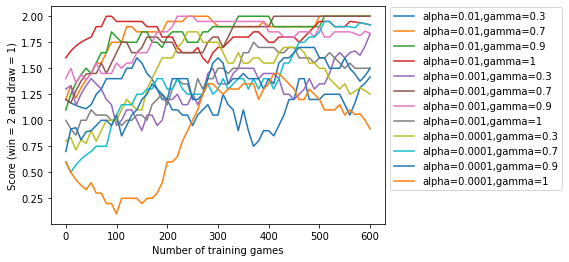

In [7]:
w = 10
test_result_len = n_train_games//test_frequency
calib = np.convolve(np.ones(test_result_len+1), np.ones(w), 'same')
for i in range(len(results)):
    this_score_first = [False]
    this_score_second = [False]
    this_score_first.extend(results[i]['test_result_first'])
    this_score_second.extend(results[i]['test_result_second'])
    this_score_first = 1*(np.array(this_score_first)==0) + 2*(np.array(this_score_first)==1)
    this_score_second = 1*(np.array(this_score_second)==0) + 2*(np.array(this_score_second)==1)
    mean_smooth_score = np.convolve((this_score_first+this_score_second)/2, np.ones(w), 'same') / calib
    plt.plot(np.arange(0,n_train_games+1, test_frequency),mean_smooth_score, 
             label='alpha={},gamma={}'.format(results[i]['alpha'],results[i]['gamma']))
plt.legend(bbox_to_anchor=(1,1.02))
plt.xlabel('Number of training games')
plt.ylabel('Score (win = 2 and draw = 1)');

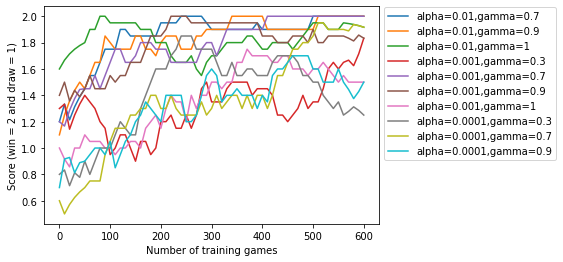

In [13]:
w = 10
test_result_len = n_train_games//test_frequency
calib = np.convolve(np.ones(test_result_len+1), np.ones(w), 'same')
for i in range(len(results)-2):
    this_score_first = [False]
    this_score_second = [False]
    this_score_first.extend(results[i+1]['test_result_first'])
    this_score_second.extend(results[i+1]['test_result_second'])
    this_score_first = 1*(np.array(this_score_first)==0) + 2*(np.array(this_score_first)==1)
    this_score_second = 1*(np.array(this_score_second)==0) + 2*(np.array(this_score_second)==1)
    mean_smooth_score = np.convolve((this_score_first+this_score_second)/2, np.ones(w), 'same') / calib
    plt.plot(np.arange(0,n_train_games+1, test_frequency),mean_smooth_score, 
             label='alpha={},gamma={}'.format(results[i+1]['alpha'],results[i+1]['gamma']))
plt.legend(bbox_to_anchor=(1,1.02))
plt.xlabel('Number of training games')
plt.ylabel('Score (win = 2 and draw = 1)');